In [63]:
# from google.colab import drive
# drive.mount('/content/drive')

In [64]:
# data = pd.read_csv("./drive/MyDrive/Colab Notebooks/Data/nike1.csv").astype('float32')

In [65]:
import numpy as np
from PIL import Image
import glob
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

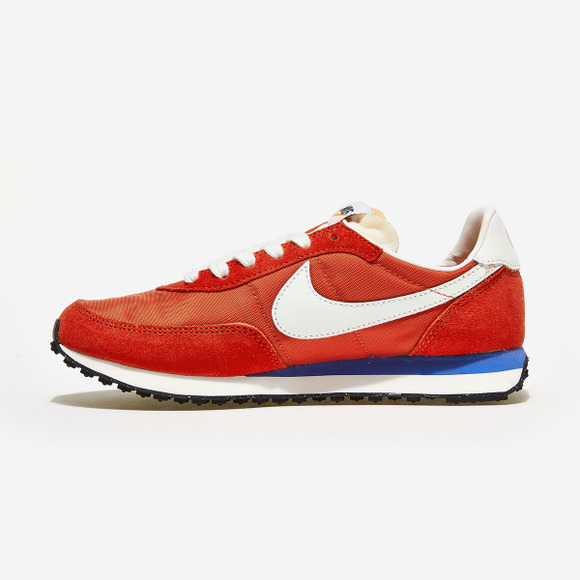

In [66]:
img_raw = Image.open('./Data/nike1.jpg')
img_raw

In [67]:
imgArr = np.array(img_raw, dtype=np.int32)
imgArr

array([[[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       ...,

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]]

In [68]:
imgBlackArr = 255 - imgArr
imgBlackArr

array([[[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=int32)

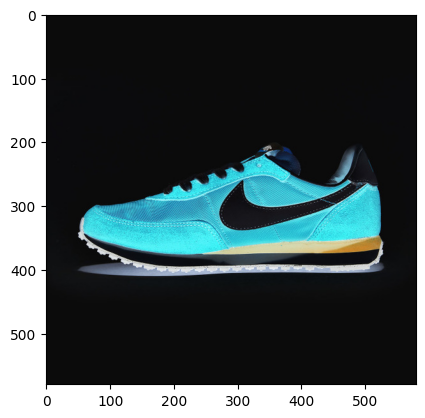

In [69]:
plt.imshow(imgBlackArr)
plt.show()

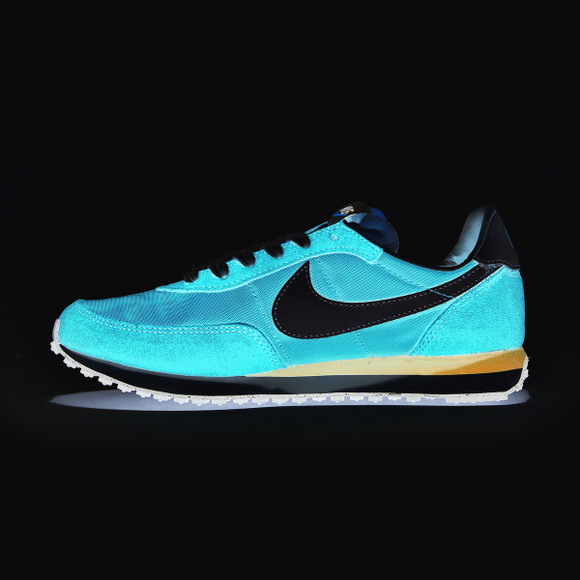

In [70]:
imgBlack = Image.fromarray(imgBlackArr.astype('uint8'))
imgBlack

In [71]:
imgBlackResize = imgBlack.resize((128,128))
imgBlackResize
imgBlackResize.save('./Data/nike1Black128.jpg', 'JPEG')

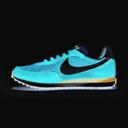

In [72]:
# image 불러오기
file = './Data/nike1Black128.jpg'
img = Image.open(file)
img

In [73]:
imgArr = np.array(img, dtype=np.int32)
imgArr.shape

(128, 128, 3)

In [74]:
# 유사 이미지 만들기

fileCount = 0
image_w = 128
image_h = 128

for angle in range(-30, 30, 1):
    img1 = img.rotate(angle)
    img1.save("./Data/nike1/nike1_%03d.jpg" % (fileCount), "JPEG")
    fileCount += 1

In [75]:
number_of_data = 60
img_width_size = 128
img_height_size = 128
img_channel = 3

In [76]:
train = np.zeros(number_of_data * img_width_size * img_height_size * img_channel, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size, img_channel)
i = 0
for file in sorted(glob.glob("./Data/nike1/*.jpg")):
    img = Image.open(file)
    img = np.array(img, dtype=np.int32)
    train[i,:,:] = img
    i += 1

In [77]:
train.shape

(60, 128, 128, 3)

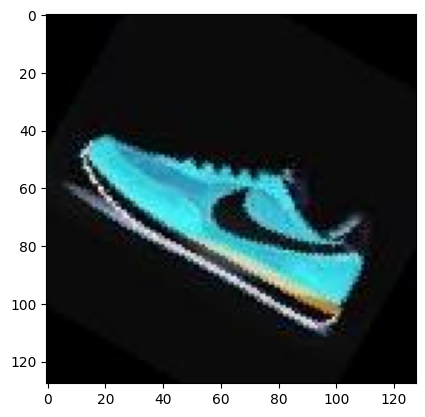

In [78]:
import matplotlib.pyplot as plt
plt.imshow(train[0].reshape(img_width_size, img_height_size, img_channel))
plt.show()

In [79]:
import pandas as pd
train = train.reshape(-1, img_width_size * img_height_size * img_channel)

df = pd.DataFrame(train)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df.to_csv("./Data/nike1.csv", index=False)

In [81]:
data_raw = pd.read_csv("./Data/nike1.csv").astype('float32')
data_raw.head()
data = data_raw.iloc[0:12,:]
# data = data_raw.iloc[12:24,:]
# data = data_raw.iloc[24:36,:]
# data = data_raw.iloc[36:48,:]
# data = data_raw.iloc[48:60,:]
data

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# 3D Vector 변환
width, height, channel = 128, 128, 3
x_train = data.values
x_train = x_train.reshape((x_train.shape[0], width, height, channel))
print(x_train.shape)

(12, 128, 128, 3)


In [83]:
# image pixel normalization[0, 255] -> [-1, 1], tanh는 -1에서 1까지의 범위
X = (x_train - 127.5) / 127.5
print(X[0])

[[[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 ...

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

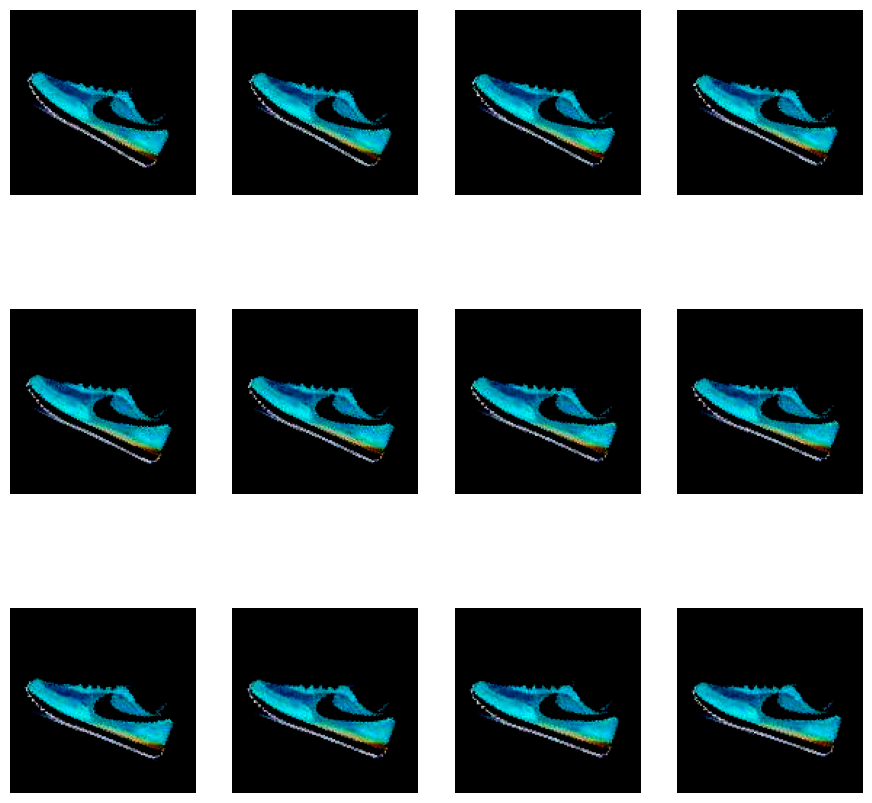

In [84]:
# 이미지 시각화
plt.figure(figsize=(11, 11))

i = 1
for image in X:
    plt.subplot(3, 4, i)
    image = image.reshape(width, height, channel)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    i += 1
    if i > 12: break
plt.show()

In [85]:
# 학습 데이터 batch 준비
BATCH_SIZE = 12

# BATCH size로 나누기
train_dataset = tf.data.Dataset.from_tensor_slices(X).batch(BATCH_SIZE)
print(train_dataset)

<BatchDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)>


In [86]:
# Generator 모델 네트워크 구성

def build_generator_model():
    model = keras.Sequential() # Keras 모델 생성

    model.add(keras.layers.Dense(1024, input_dim=12, use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())
    
    model.add(keras.layers.Dense(32*32*128, use_bias=False)) # 128 / 4 = 32
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())
    
    # Resahpe (7*7)
    model.add(keras.layers.Reshape((32, 32, 128)))  # 128 / 4 = 32
    
    model.add(keras.layers.Conv2DTranspose(512, (5, 5), # 128 * 2 * 2
                                    strides=(1, 1), padding='same', use_bias=False))
    model.add(keras.layers.BatchNormalization()) 
    model.add(keras.layers.LeakyReLU())
    
    # (7*7) -> (14*14)
    model.add(keras.layers.Conv2DTranspose(256, (5, 5), # 128 * 2
                                    strides=(2, 2), padding='same', use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())
    
    # (14*14) -> (28*28)
    model.add(keras.layers.Conv2DTranspose(3, (5, 5), 
                                    strides=(2, 2), padding='same', activation='tanh'))
    assert model.output_shape == (None, 128, 128, 3)

    return model

In [87]:
# 생성자 모델 생성
generator = build_generator_model()
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              12288     
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 131072)            134217728 
                                                                 
 batch_normalization_5 (Batc  (None, 131072)           524288    
 hNormalization)                                                 
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 131072)           

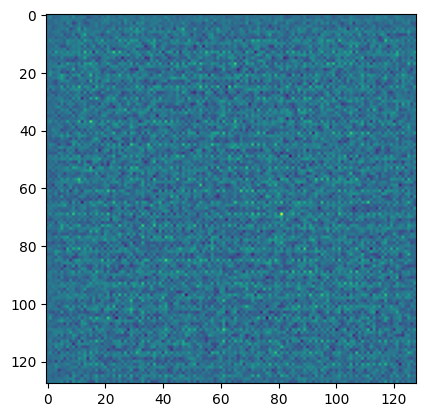

In [88]:
# 학습되지 않은 생성자 모델이 만든 이미지
noise = tf.random.normal([1, 12]) # 12 : 출력이미지 개수
generated_image = generator(noise, training = False)
plt.imshow(generated_image[0,:,:,0])

In [89]:
# Discriminator 모델 네트워크 구성

def build_discriminator_model():

    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(256, (5, 5), strides=2, padding='same',  # 256 = 128 * 2
                       input_shape=[128, 128, 3])) # input image size
    model.add(keras.layers.LeakyReLU(0.2))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Conv2D(512, (5, 5), strides=2, padding='same')) # 512 = 256 * 2
    model.add(keras.layers.LeakyReLU(0.2))
    
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(512)) # 512 = 256 * 2
    model.add(keras.layers.LeakyReLU(0.2))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(1))
    
    return model

In [90]:
# 판별자 모델 생성
discriminator = build_discriminator_model()
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       19456     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 64, 64, 256)       0         
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 256)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 512)       3277312   
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 512)       0         
                                                                 
 flatten_1 (Flatten)         (None, 524288)            0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [91]:
# 학습되지 않은 판별자의 결과
predicted = discriminator(generated_image)
print(predicted)

tf.Tensor([[2.08436e-05]], shape=(1, 1), dtype=float32)


In [92]:
# Optimizer 생성
# 생성자용
generator_optimizer = keras.optimizers.Adam(1e-4)
# 판별자용
discriminator_optimizer = keras.optimizers.Adam(1e-4)

In [93]:
# Binary Crossentropy for minMax
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)

In [94]:
# Generator Loss 함수
# 생성자 모델의 목표 :
# 판별자 모델이 가짜 이미지를 판별했을 때 판별값이 1에 가까워 지도록
def generator_loss(fake_output) :
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [95]:
# Discriminator Loss 함수
# 판별자 모델의 목표:
# 1. 진짜 이미지를 판별했을 때 판별값이 1에 가까워 지도록
# 2. 가짜 이미지를 판별했을 때 판별값이 0에 가까워 지도록

def discriminator_loss(real_output, fake_output) :
    real_loss = cross_entropy(tf.ones_like(real_output), real_output) # 1과 진짜이미지 판별 값 비교
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) # 0과 가짜이미지 판별 값 비교
    total_loss = real_loss + fake_loss
    return total_loss

In [96]:
# 학습값 설정
EPOCHS = 1000
noise_dim = 12

In [97]:
# tf.function 에서는 파이썬 코드의 문장 실행 순서를 참조하여 실행 순서의 모호성을 해결합니다. tensorflow에서는 사용하는 것이 좋다.
@tf.function
def train_step(images):
    # 생성자 input noise
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    # Gradient descent 계산 및 파라미터 업데이트
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True) # 진짜 이미지를 봤을 때의 판별 값
      fake_output = discriminator(generated_images, training=True) # 가짜 이미지를 봤을 때의 판별 값

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [98]:
# 테스트 노이즈 시각화 함수

test_noise = tf.random.normal([12, noise_dim]) # 학습 시각화를 위한 테스트 노이즈 9개

def show_generated_images(epoch):
    lists = []  ###
    images = generator.predict(test_noise)
    images = 0.5 * images + 0.5 # tanh는 sigmoid보다 데이터 범위가 2배가 더 크므로 이를 조정 
    
    plt.figure(figsize=(11,11))
    
    i = 1
    for image in images:
        image = image.reshape(width, height, channel)
        lists.append(image)
        plt.subplot(3, 4, i)
        plt.imshow(image)
        plt.axis('off')
        i+=1

    plt.suptitle("Generated Images on EPOCH: %s" % epoch, fontsize = 25)
    plt.show()
    
    return lists

In [99]:
# 학습코드
def train(dataset, epochs) :
    ls = [] ###
    for epoch in range(epochs) :
        for image_batch in dataset : # batch학습(64)
            train_step(image_batch)
        print("%s epochs trained"%epoch)
        if epoch % 5 == 0 :
            ls = show_generated_images(epoch)
            
    return ls

In [100]:
# # 학습 시작
# images = train(train_dataset, EPOCHS + 1)

In [101]:
# imgNp = np.array(images)
# imgNp.shape
# imgNp = imgNp * 255

# for i in range(12):
#     img = Image.fromarray(np.uint8(imgNp[i]))

#     img.save(f'/drive/MyDrive/Colab Notebooks/Data/nike1/nike1-{i}.jpg', 'JPEG')